说明: 投票量增长表格是后来加的需求,所以单独写了.这种解决方法效率很低.最好的结局方案是只用单个def画图,标题自定义.

如果中间有票数为0的情况表示在该时段掉出前12,无法采集数据

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def extract_time(time_str):
    """
    Extract time from file name
    """
    start = time_str.find('-')
    end = time_str.find('.csv')
    time_str = time_str[start + 1:end]
    time = time_str.split('_')
    y, m, d, h, mi = time
    return y, m, d, h, mi

In [8]:
def csv_creater(path):
    """
    Create a pandas Dataframe with format: row - username, column - update time

    type path: String. path which stores original csv files.
    """
    files = os.listdir(path)
    names_set = set()
    output_df = pd.DataFrame()
    for f in files:
        yy, mm, dd, hh, mi = extract_time(f)
        cur_time = yy + '-' + mm + '-' + dd + ' ' + hh + ':' + mi
        # create a new column for new time
        output_df[cur_time] = 0
        df = pd.read_csv(path + '/' + f)
        existed_names = output_df.index.values
        for row in df.iterrows():
            name = row[1]["name"]
            vote = int(row[1]["vote"])
            if name not in existed_names:
                # if it is a new person, create a new row
                output_df.loc[name] = 0
            # else locate and write
            output_df.loc[name, cur_time] = vote
    return output_df

In [9]:
data_2020 = csv_creater("../get_data/2020_data")
data_2020

,2020-12-18 16:19,2020-12-18 16:39,2020-12-18 16:59,2020-12-18 17:19,2020-12-18 17:39,2020-12-18 17:59,2020-12-18 18:19,2020-12-18 18:39,2020-12-18 18:59,2020-12-18 19:20,...,2020-12-23 19:59,2020-12-23 20:19,2020-12-23 20:39,2020-12-23 20:59,2020-12-23 21:19,2020-12-23 21:39,2020-12-23 21:59,2020-12-23 22:19,2020-12-23 22:39,2020-12-23 22:59
剑网3制作人郭炜炜,601995,631637,668837,706696,740335,766387,789137,809558,828011,843889,...,4267729,4271617,4275144,4278876,4383091,4387314,4391371,4396006,4400425,4405418
UziQAQ,425238,430616,437151,443615,449935,455466,460481,466965,475256,482514,...,1668626,1669957,1671589,1672936,1774592,1776157,1777647,1779560,1781130,1783014
李佳琦Austin,357719,360018,362795,365370,368147,370362,372462,374804,377319,379628,...,1159665,1160826,1162015,1163140,1164578,1166004,1167459,1169034,1170556,1172159
一条小团团OvO,207959,209976,212231,214349,216634,218744,220919,223033,225110,227114,...,922733,923658,924598,925548,1026486,1027412,1028348,1029412,1030391,1031700
薇娅viyaaa,188809,190530,191789,192841,194390,195724,196820,199015,201861,204899,...,1201452,1201886,1202486,1202946,1203541,1204038,1204722,1205416,1206118,1206804
李子柒,183819,184901,185848,186789,187726,188727,189722,190869,192052,193035,...,771021,774379,777766,781101,784613,788237,791742,795362,798879,802685
iG_TheShy,158978,160195,161657,162796,164053,165043,165942,166957,168040,169259,...,664091,666368,668693,671052,772271,773043,773683,774352,775175,776046
old先,137517,140272,141905,143563,145382,147057,148922,150756,152479,154224,...,651277,653831,656439,659071,0,0,0,0,0,0
韦神_GODV,126155,127208,128232,129803,130772,131386,132159,132530,133273,135035,...,671526,673576,675619,677728,778472,778976,779461,779965,782522,783430
JackeyLoveasdzz,115038,115659,116157,116526,117186,117717,118510,119153,119661,120507,...,0,0,0,0,675126,677130,679348,681931,684480,687175


In [10]:
def plot_data(pd_frame, show = False, show_num = 9, step = 1):
    """
    :type pd_frame: Pandas Dataframe from csv_creater
    :type show: bool, show number of votes or not
    :type show_num: int, how many user will be shown in the figure(not exceed len(pd_frame))
    :type step: int
    """
    # 解决中文乱码问题
    plt.rcParams['font.sans-serif']=['SimHei']
    # figure size
    plt.figure(figsize=(max(20, len(pd_frame.iloc[0])//step//12), 10))
    names = pd_frame.index.values.tolist()
    x = pd_frame.columns.values.tolist()[::step]
    l = min(show_num, len(pd_frame))
    for i in range(l):
        y = pd_frame[i:i + 1].values[0][::step]
        plt.plot(x, y, label = names[i])
        # data label
        if show == True:
            for a, b in zip(x, y):
                plt.text(a, b, b, ha='center', va='bottom', fontsize=8)
    plt.title("2021微博之夜投票总票数")
    plt.xlabel('时间',fontsize=10)
    plt.xticks(rotation="75", fontsize = 6)
    plt.ylabel('票数',fontsize=10)
    plt.legend(loc = "upper left")
    plt.show()

In [11]:
def plot_inc_rate(pd_frame, show = False, show_num = 9, step = 1, rm_noice = True):
    """
    :type pd_frame: Pandas Dataframe from csv_creater
    :type show: bool, show number of votes or not
    :type show_num: int, how many user will be shown in the figure(not exceed len(pd_frame))
    :type step: int
    """
    # 解决中文乱码问题
    plt.rcParams['font.sans-serif']=['SimHei']
    # figure size
    plt.figure(figsize=(max(25, len(pd_frame.iloc[0])//step//12), 7))
    names = pd_frame.index.values.tolist()[:show_num]
    x = pd_frame.columns.values.tolist()[::step][1:]
    l = min(show_num, len(pd_frame))
    for i in range(l):
        y = pd_frame[i:i + 1].values[0][::step]
        y_rate = []
        for j in range(1, len(y)):
            if y[j-1] and y[j]:
                rate = y[j] - y[j - 1]
                if rm_noice:
                    if rate > 100000:
                        rate -= 100000
                y_rate.append(rate)
            else:
                y_rate.append(0)
        plt.plot(x, y_rate, label = names[i])
        # data label
        if show:
            for a, b in zip(x, y_rate):
                plt.text(a, b, b, ha='center', va='bottom', fontsize=8)
    plt.title("2021微博之夜每" + str(step * 20) + "分钟票数增长量")
    plt.xlabel('时间',fontsize=10)
    plt.xticks(rotation="75", fontsize = 5)
    plt.ylabel('票数',fontsize=10)

    plt.legend(loc = "upper left")
    plt.show()

In [12]:
def draw_increase_df(pd_frame, step = 1):
    """
    :type pd_frame: Pandas DataFrame return from def csv_creator
    :type step: int
    :rtype df: Pandas Dataframe, increase in every step * 20 minutes
    """
    names = pd_frame.index.values.tolist()
    times = pd_frame.columns.values.tolist()
    df = pd.DataFrame(data = 0, columns=times[1::step], index = names) 
    for name in names:
        for i in range(1, len(times)):
            df.loc[name, times[i]] = pd_frame.loc[name, times[i]] - pd_frame.loc[name, times[i - 1]]
    return df

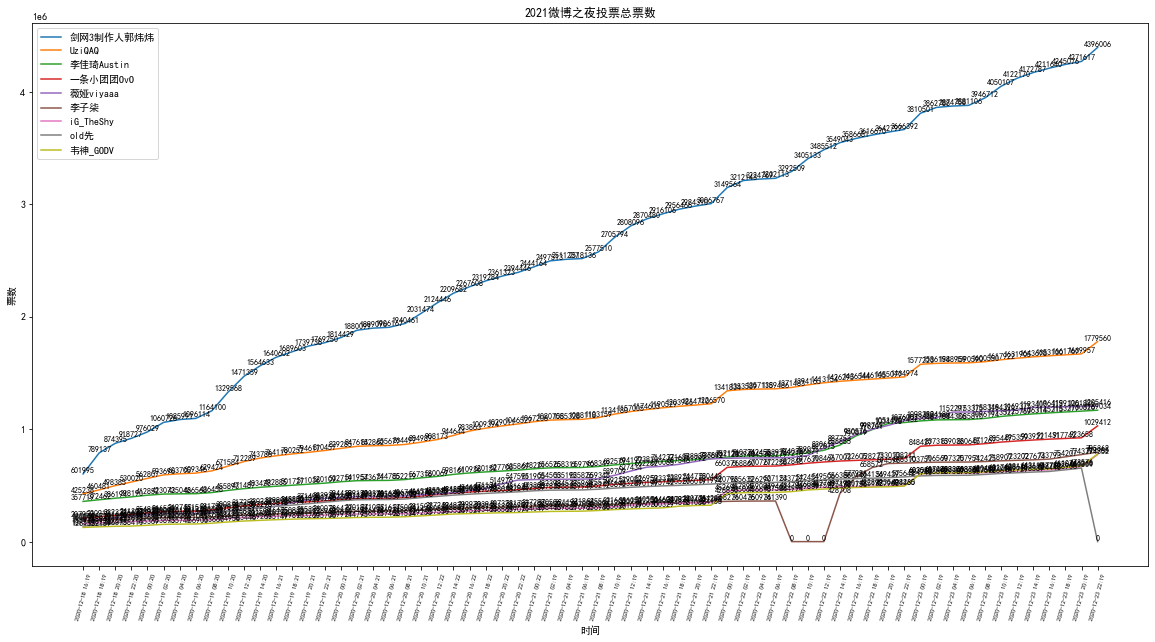

In [13]:
plot_data(data_2020, step = 6, show = True)

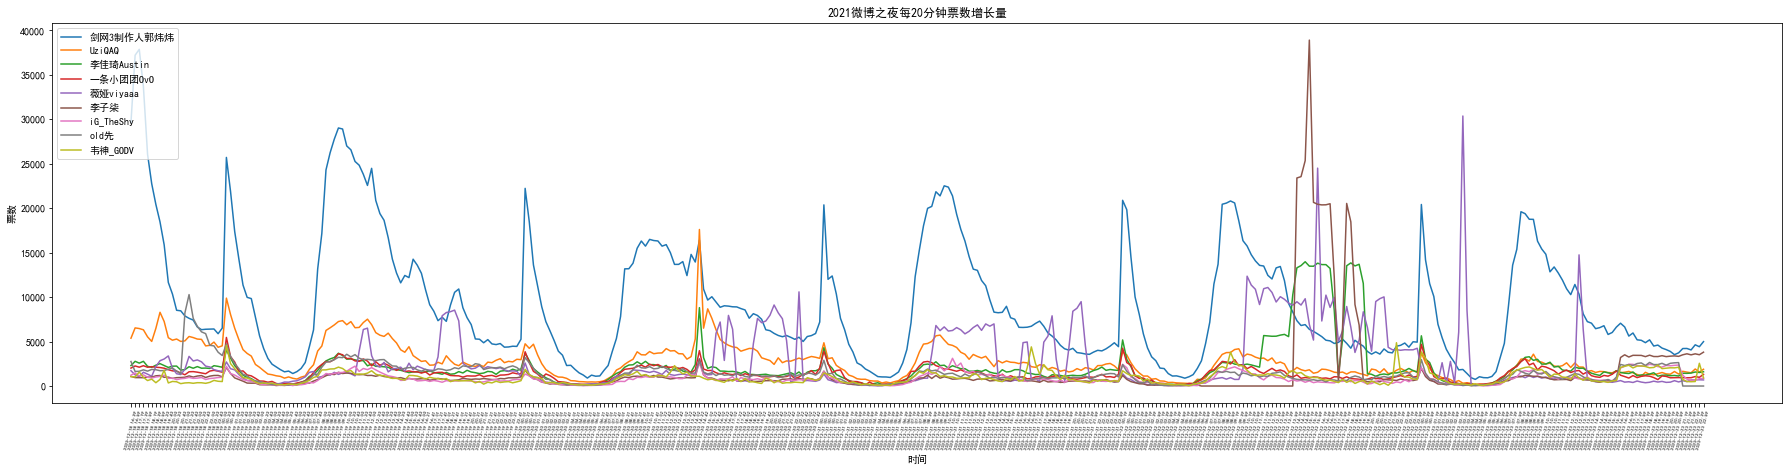

In [14]:
plot_inc_rate(data_2020, step = 1)

In [15]:
dt = draw_increase_df(data_2020)

In [32]:
def abnormal_data(pd_frame, step = 1):
    times = pd_frame.columns.values.tolist()
    for i in range(len(pd_frame)):
        curseries = dt.iloc[i]
        name = curseries.name
        for j in range(len(curseries)):
            curval = dt.iloc[i, j]
            if 0 < j < len(curseries) - 1 and curval > 20000 * step:
                pre = dt.iloc[i, j - 1]
                suf = dt.iloc[i, j + 1]
                if pre > 0 and suf > 0:
                    print(name + "在" + str(20 * step) + "分钟内增长量大于" + str(step * 2) + "万的投票出现在" + times[j] + ", 数值为" + str(curval) + ", 之前同时间增长量为" + str(pre) + ", 之后同时间增长量为" + str(suf))

            
abnormal_data(dt)

剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-18 16:59, 数值为37200, 之前同时间增长量为29642, 之后同时间增长量为37859
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-18 17:19, 数值为37859, 之前同时间增长量为37200, 之后同时间增长量为33639
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-18 17:39, 数值为33639, 之前同时间增长量为37859, 之后同时间增长量为26052
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-18 17:59, 数值为26052, 之前同时间增长量为33639, 之后同时间增长量为22750
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-18 18:19, 数值为22750, 之前同时间增长量为26052, 之后同时间增长量为20421
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-18 18:39, 数值为20421, 之前同时间增长量为22750, 之后同时间增长量为18453
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-19 00:20, 数值为25705, 之前同时间增长量为6512, 之后同时间增长量为21870
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-19 00:40, 数值为21870, 之前同时间增长量为25705, 之后同时间增长量为17373
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-19 08:20, 数值为24295, 之前同时间增长量为17155, 之后同时间增长量为26236
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-19 08:40, 数值为26236, 之前同时间增长量为24295, 之后同时间增长量为27756
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-19 09:00, 数值为27756, 之前同时间增长量为26236, 之后同时间增长量为29017
剑网3制作人郭炜炜在20分钟内增长量大于2万的投票出现在2020-12-19 09:20